# 공유이동수단 연관 키워드 찾기

In [441]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import font_manager as fm, rc


# 한글 인식 오류 대치
font_path='../font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# pandas 가로, 세로 데이터 출력 조절
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

---
## 데이터 합치기

In [210]:
# csv파일 리스트 생성 후 읽어오기
files = os.listdir('../data/relation/')
data_arch = []
for file in files:
    data_arch.append(pd.read_csv(f'../data/relation/{file}'))
data_arch

In [ ]:
data_arch2 = []
for i, df in enumerate(data_arch):
    # 월간검색량 + 블로그 누적발행량
    df.insert(1, 'volume',
              df['월간 검색량 (Total)'] + df['블로그 누적 발행량'])
    df.drop(df.iloc[:, 2:], axis=1, inplace=True)
    # 연관키워드 데이터 재배치
    df.insert(1, '연관키워드', df['키워드'])
    # 첫번째 컬럼명 '키워드' 이름을 검색 단어로 변경
    df.rename(columns={'키워드': '검색키워드'}, inplace=True)
    df['검색키워드'] = files[i].split('.')[0]
    data_arch2.append(df)
data_arch2

In [ ]:
# 검색키워드, 연관키워드, 검색량 데이터프레임 생성
df2 = pd.concat(data_arch2,
                keys=['공유자전거', '따릉이',
                      '전동킥보드', '카카오자전거',
                      '퍼스널모빌리티'])
df2

---
## 공유자전거와 같이 가장 많이 검색한 키워드

In [400]:
bicycle = df2.groupby('검색키워드').get_group('공유자전거').sort_values('volume')
bicycle

검색키워드      연관키워드  volume
공유자전거 5   공유자전거    노펑크 자전거    1800
      15  공유자전거    anm 자전거    1997
      11  공유자전거  고양시 공유자전거    4631
      13  공유자전거   천안 공유자전거    5411
      17  공유자전거     4발 자전거    5475
      7   공유자전거    배달용 자전거    6100
      3   공유자전거   일산 공유자전거    6740
      12  공유자전거   수원 공유자전거   10055
      18  공유자전거     삼륜 자전거   12567
      4   공유자전거  제주도 공유자전거   15015
      6   공유자전거   대구 공유자전거   15679
      0   공유자전거     전기자전거샵   15696
      8   공유자전거  경기도 공유자전거   17908
      10  공유자전거   인천 공유자전거   20649
      14  공유자전거   부산 공유자전거   22864
      9   공유자전거      모터자전거  109300
      16  공유자전거     배달 자전거  163325
      2   공유자전거     충전 자전거  188423
      1   공유자전거      국내자전거  355131
      19  공유자전거     전기 자전거  505346

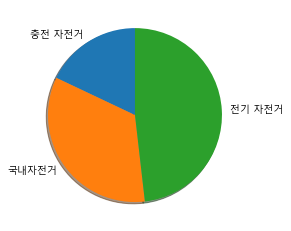

In [410]:
plt.pie(bicycle['volume'][-3:],
        labels=bicycle.iloc[-3:, 1],
        startangle=90,
        shadow=True)
plt.show()

---
## 공유자전거, 따릉이, 전동킥보드, 카카오자전거, 퍼스널모빌리티의 연관키워드 중 자주 나온 단어

In [ ]:
df3 = df2.drop('검색키워드', axis=1)
df3

In [260]:
word = df3['연관키워드'].str.split(expand=True)
word

0      1     2
공유자전거   0   전기자전거샵   None  None
        1    국내자전거   None  None
        2       충전    자전거  None
        3       일산  공유자전거  None
        4      제주도  공유자전거  None
...            ...    ...   ...
퍼스널모빌리티 15     스쿠터   None  None
        16      전동    스쿠터  None
        17      전기    스쿠터  None
        18      전동    킥보드  None
        19      전기    자전거  None

[78 rows x 3 columns]

In [296]:
word2 = []
for column in word:
    word2.extend(list(word[column]))
word3 = pd.Series(word2).value_counts()
word4 = pd.DataFrame(word3, columns=['빈도수'])
word5 = word4.iloc[:8, ]
word5

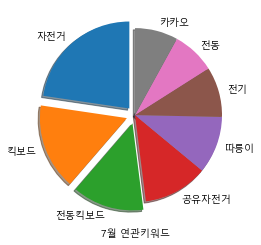

In [308]:
plt.pie(word5['빈도수'],
        labels=list(word5.index),
        explode=(0.1, 0.1, 0.1, 0, 0, 0, 0, 0),
        shadow=True,
        startangle=90)
plt.xlabel('7월 연관키워드')
plt.show()

---
## 6개의 키워드가 쓰인 기간

In [329]:
keybirth = pd.read_csv('../data/키워드최초등장일.csv')

In [335]:
keybirth['키워드 최초 등장일'] = pd.to_datetime(keybirth['키워드 최초 등장일'])

In [367]:
keybirth['사용기간(단위: 년)'] =\
    datetime.datetime.today().year\
    - keybirth['키워드 최초 등장일'].dt.year
keybirth.sort_values(by='사용기간(단위: 년)', ignore_index=True)

,키워드,키워드 최초 등장일,사용기간(단위: 년)
0,공유이동수단,2020-07-09,2
1,카카오자전거,2017-09-12,5
2,공유자전거,2017-03-11,5
3,퍼스널모빌리티,2016-01-01,6
4,전동킥보드,2016-01-01,6
5,따릉이,2016-01-01,6


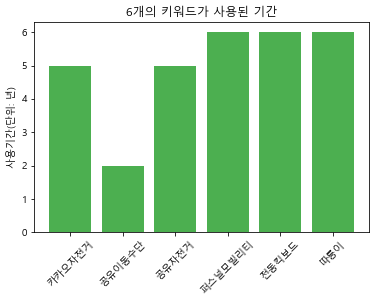

In [463]:
x = np.arange(6)
y = keybirth['사용기간(단위: 년)']
labels = keybirth['키워드']

plt.bar(x, y, color='#4CAF50')
plt.title('6개의 키워드가 사용된 기간')
plt.ylabel('사용기간(단위: 년)')
plt.xticks(x, labels, rotation=45)
# plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)

plt.show()